# DEMO: PSI Selector in Feature-Engine

## Goals
- Perform feature selection based on PSI value.
- Add a Sklearn compatible feature selection object.
    - Can be used in a Sklearn pipeline.
    - Add the selector to the feature-engine library.
- Main PR is merged but documentation still needs to be done. 
    - Documentation needs to be done.

## Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures, DropFeatures

X, y = make_classification(
        n_samples=500,
        n_features=6,
        random_state=0
    )

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Add a column with a shift

X['var_3'][300:] = X['var_3'][300:] + 1

transformer = DropHighPSIFeatures(split_frac=0.6)
transformer.fit(X)

X_transformed = transformer.transform(X)

In [3]:
transformer.psi_values_

{'var_0': 0.07405459925568803,
 'var_1': 0.09124093185820083,
 'var_2': 0.16985790067687764,
 'var_3': 1.342485289730313,
 'var_4': 0.0743442762545251,
 'var_5': 0.06809060587241555}

In [4]:
transformer.cut_off_

299.4

In [5]:
transformer.features_to_drop_

['var_3']

In [6]:
X_transformed.columns

Index(['var_0', 'var_1', 'var_2', 'var_4', 'var_5'], dtype='object')

<AxesSubplot:xlabel='var_3', ylabel='Proportion'>

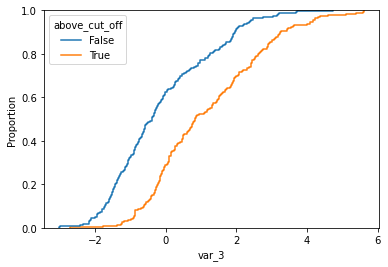

In [7]:
X['above_cut_off'] = X.index > transformer.cut_off_
sns.ecdfplot(data=X, x='var_3', hue='above_cut_off')

<AxesSubplot:xlabel='var_1', ylabel='Proportion'>

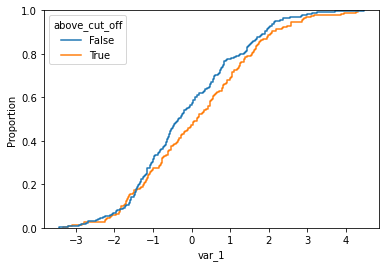

In [8]:
sns.ecdfplot(data=X, x='var_1', hue='above_cut_off')

In [9]:
import pandas as pd
from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures

X, y = make_classification(
        n_samples=500,
        n_features=6,
        random_state=0
    )

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Let's add a variable for the customer ID
X['customer_id'] = [customer_id for customer_id in range(1, 501)]

# Add a column with the seniority... that is related to the customer ID
X['seniority'] = 100 - X['customer_id'] // 10

transformer = DropHighPSIFeatures(split_col='customer_id', cut_off=250)
X_transformed = transformer.fit_transform(X)

In [10]:
transformer.psi_values_

{'var_0': 0.07385590683974477,
 'var_1': 0.061155637727757485,
 'var_2': 0.1736694458621651,
 'var_3': 0.044965387331530465,
 'var_4': 0.0904519893659045,
 'var_5': 0.027545195437270797,
 'seniority': 7.8688986006052035}

In [11]:
transformer.features_to_drop_

['seniority']

In [12]:
X_transformed.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'customer_id'], dtype='object')

In [13]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures

X, y = make_classification(
    n_samples=1000,
    n_features=6,
    random_state=0
)

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Add a categorical column
X['group'] = ["A", "B", "C", "D", "E"] * 200

X['group_means'] = X.group.map({"A": 1, "B": 2, "C": 0, "D": 1.5, "E": 2.5})
X['shifted_feature'] = X['group_means'] + X['var_2']

In [14]:
transformer = DropHighPSIFeatures(split_col='group', cut_off='C')
transformer.fit(X)

DropHighPSIFeatures(cut_off='C', split_col='group')

In [15]:
transformer.psi_values_

{'var_0': 0.06485778974895254,
 'var_1': 0.03605540598761757,
 'var_2': 0.040632784917352296,
 'var_3': 0.023845405645510645,
 'var_4': 0.028007185972248064,
 'var_5': 0.07009152672971862,
 'group_means': 6.601444547497699,
 'shifted_feature': 0.48428009522119164}

In [16]:
transformer.features_to_drop_

['group_means', 'shifted_feature']

In [17]:
X_transformed = transformer.fit_transform(X)

X_transformed.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'group'], dtype='object')

In [18]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,group,group_means,shifted_feature
0,1.164686,-0.509491,1.161515,-1.056957,-1.718650,1.012980,A,1.0,2.161515
1,-0.997144,-0.338810,-0.246891,-0.211438,1.626650,-1.250173,B,2.0,1.753109
2,0.570795,0.666492,-0.314469,-0.911881,0.106720,0.949110,C,0.0,-0.314469
3,-1.130476,0.140957,-0.786362,-0.575256,1.103504,-1.157915,D,1.5,0.713638
4,-0.910015,0.547780,-1.051925,-1.489933,-0.773193,-0.717521,E,2.5,1.448075
...,...,...,...,...,...,...,...,...,...
995,1.941052,-0.785515,1.874425,-2.716280,0.938832,1.719642,A,1.0,2.874425
996,0.670054,2.054991,-1.596644,-0.396524,-0.940157,1.742915,B,2.0,0.403356
997,-0.263078,2.551181,-2.612108,-0.019323,-1.805936,0.974802,C,0.0,-2.612108
998,-0.702688,-1.146666,0.701740,1.363743,-0.277940,-1.329570,D,1.5,2.201740


<AxesSubplot:>

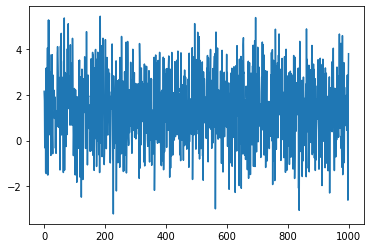

In [19]:
X.shifted_feature.plot()

<AxesSubplot:xlabel='shifted_feature', ylabel='Proportion'>

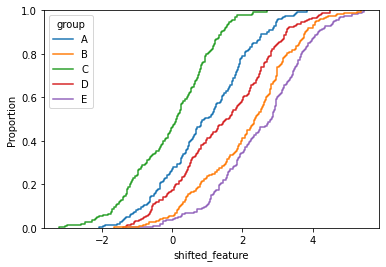

In [20]:
sns.ecdfplot(data=X, x="shifted_feature", hue="group")

<AxesSubplot:xlabel='var_0', ylabel='Proportion'>

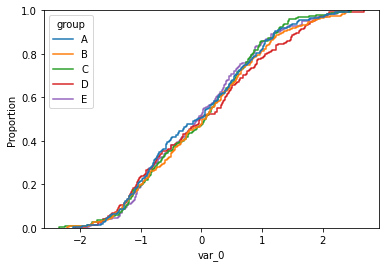

In [21]:
sns.ecdfplot(data=X, x="var_0", hue="group")

In [22]:
trans = DropHighPSIFeatures(split_col='group', cut_off=['A', 'C', 'E'])
X_no_drift = trans.fit_transform(X)

In [23]:
trans.psi_values_

{'var_0': 0.04322345673014104,
 'var_1': 0.03534439253617049,
 'var_2': 0.05220272785661243,
 'var_3': 0.04550964862452317,
 'var_4': 0.04492720670343145,
 'var_5': 0.044886435640028144,
 'group_means': 6.601444547497699,
 'shifted_feature': 0.3683642099948127}

In [24]:
trans.features_to_drop_

['group_means', 'shifted_feature']

In [25]:
X_no_drift.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'group'], dtype='object')

In [26]:
import pandas as pd
from datetime import date
from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures

X, y = make_classification(
        n_samples=1000,
        n_features=6,
        random_state=0
    )

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Add two time variables to the dataframe
X['time'] = [date(year, 1, 1) for year in range(1000, 2000)]
X['century'] = X['time'].apply(lambda x: ((x.year - 1) // 100) + 1)

X = X.sample(frac=1)

In [27]:
X.time.loc[0]

datetime.date(1000, 1, 1)

# Test time

In [28]:
date

datetime.date

In [29]:
date(2000, 10, 25)

datetime.date(2000, 10, 25)

In [30]:
X['time_2'] = pd.date_range(start='1/1/2018', periods=len(X))

In [31]:
X['time_2'].loc[0]

Timestamp('2018-01-27 00:00:00')

In [32]:
pd.to_datetime("2009-12-14")

Timestamp('2009-12-14 00:00:00')

In [33]:
transformer = DropHighPSIFeatures(split_col='time_2', cut_off=pd.to_datetime('2019-01-01'))
transformer.fit(X)

DropHighPSIFeatures(cut_off=Timestamp('2019-01-01 00:00:00'),
                    split_col='time_2')

<AxesSubplot:xlabel='century', ylabel='Proportion'>

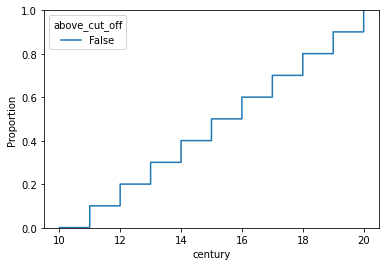

In [34]:
X['above_cut_off'] = X.time > pd.to_datetime(transformer.cut_off_)
sns.ecdfplot(data=X, x='century', hue='above_cut_off')

<AxesSubplot:xlabel='var_2', ylabel='Proportion'>

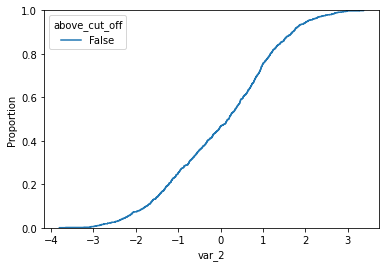

In [35]:
sns.ecdfplot(data=X, x='var_2', hue='above_cut_off')

In [36]:
transformer.psi_values_

{'var_0': 0.034876840507889334,
 'var_1': 0.04317970338271767,
 'var_2': 0.051262047729943215,
 'var_3': 0.06157284897424117,
 'var_4': 0.09745848277450826,
 'var_5': 0.026061991195863738,
 'century': 0.035922993568294155}

In [37]:
transformer.features_to_drop_

[]

In [39]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures

X, y = make_classification(
    n_samples=1000,
    n_features=6,
    random_state=0
)

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Add a categorical column
np.random.seed(0)
X['group'] = ["A", "B", "C", "D", "E"] * 100 + ["F"] * 500
X['income'] = np.random.uniform(1000, 2000, 500).tolist() + np.random.uniform(1250, 2250, 500).tolist()

X = X.sample(frac=1).reset_index(drop=True)

<AxesSubplot:xlabel='income', ylabel='Proportion'>

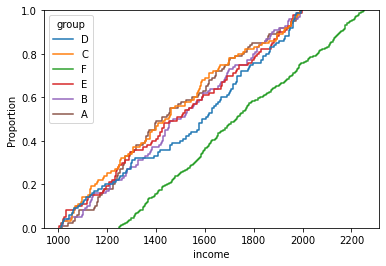

In [40]:
sns.ecdfplot(data=X, x="income", hue="group")

<AxesSubplot:xlabel='var_4', ylabel='Proportion'>

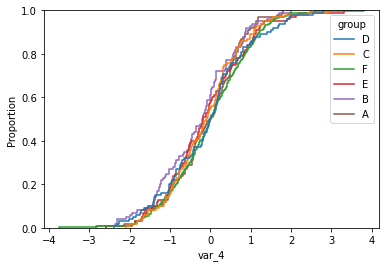

In [41]:
sns.ecdfplot(data=X, x="var_4", hue="group")

In [42]:
transformer = DropHighPSIFeatures(split_col='group', split_distinct=True)
transformer.fit(X)

DropHighPSIFeatures(split_col='group', split_distinct=True)

In [43]:
transformer.psi_values_

{'var_0': 0.014825303242393804,
 'var_1': 0.03818316821350485,
 'var_2': 0.029635981271458896,
 'var_3': 0.021700399485890084,
 'var_4': 0.061194837255216114,
 'var_5': 0.04119583769297253,
 'income': 0.46191580731264914}

In [44]:
transformer.features_to_drop_

['income']

In [45]:
X_transformed = transformer.transform(X)

X_transformed.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'group'], dtype='object')

## Create a data set

In [47]:
n_feat = 6
X, y = make_classification(
        n_samples=10,
        n_features=n_feat,
        n_redundant=2,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=0
    )
# X = StandardScaler().fit_transform(X)
# transform array into pandas df
colnames = ["var_" + str(i) for i in range(n_feat)]
X = pd.DataFrame(X, columns=colnames)

### Some features are random walks

In [48]:
features = ['var_1', 'var_2', 'var_4', 'var_5']

for feat in features:
    X[feat] = np.cumsum(X[feat])

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

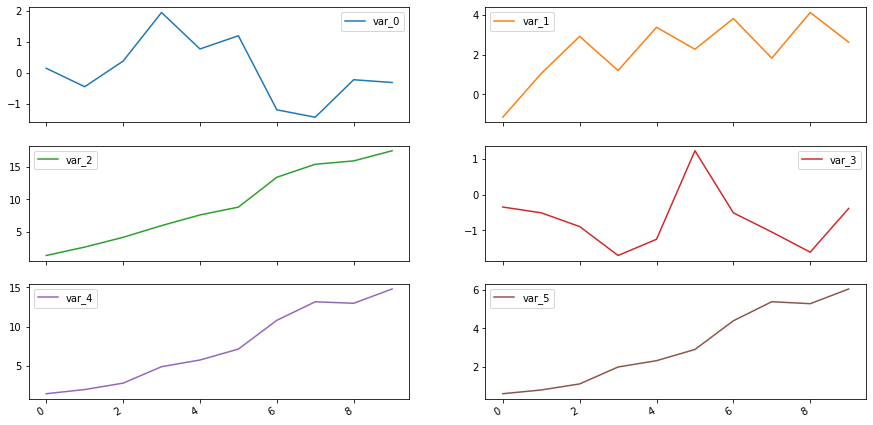

In [49]:
X.plot(subplots=True, figsize=(15, 8), layout=(3,2), sharex=True, sharey=False)

# Remove drifted features

## Split based on index

In [50]:
transformer = DropHighPSIFeatures(bins=2)
X_samp  = X.sample(frac=0.37, random_state=0)
X_no_drift = transformer.fit_transform(X_samp)

In [51]:
a, b = transformer._split_dataframe(X_samp)

In [52]:
a.reset_index().describe()

,index,var_0,var_1,var_2,var_3,var_4,var_5
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3.000000,0.582196,3.155184,5.870783,-1.074131,4.323741,1.737504
std,1.414214,0.276187,0.325630,2.441114,0.252670,2.074982,0.846680
min,2.000000,0.386902,2.924928,4.144655,-1.252795,2.856507,1.138811
25%,2.500000,0.484549,3.040056,5.007719,-1.163463,3.590124,1.438157
50%,3.000000,0.582196,3.155184,5.870783,-1.074131,4.323741,1.737504
75%,3.500000,0.679843,3.270311,6.733847,-0.984799,5.057358,2.036850
max,4.000000,0.777490,3.385439,7.596912,-0.895467,5.790975,2.336197


In [53]:
b.reset_index().describe()

,index,var_0,var_1,var_2,var_3,var_4,var_5
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,8.500000,-0.257522,3.381499,16.718404,-1.000612,13.887371,5.653638
std,0.707107,0.063330,1.060394,1.107250,0.867317,1.280634,0.536183
min,8.000000,-0.302303,2.631687,15.935460,-1.613898,12.981826,5.274499
25%,8.250000,-0.279912,3.006593,16.326932,-1.307255,13.434599,5.464068
50%,8.500000,-0.257522,3.381499,16.718404,-1.000612,13.887371,5.653638
75%,8.750000,-0.235131,3.756405,17.109876,-0.693970,14.340144,5.843207
max,9.000000,-0.212740,4.131311,17.501348,-0.387327,14.792916,6.032776


In [54]:
X_samp

,var_0,var_1,var_2,var_3,var_4,var_5
2,0.386902,2.924928,4.144655,-0.895467,2.856507,1.138811
8,-0.212740,4.131311,15.935460,-1.613898,12.981826,5.274499
4,0.777490,3.385439,7.596912,-1.252795,5.790975,2.336197
9,-0.302303,2.631687,17.501348,-0.387327,14.792916,6.032776


### Adjust the PSI threshold

In [61]:
X, y = make_classification(
        n_samples=500,
        n_features=6,
        random_state=0
    )

colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

# Add a column with a shift

X['var_3'][300:] = X['var_3'][300:] + 1

transformer = DropHighPSIFeatures(split_frac=0.6)
transformer.fit(X)

X_transformed = transformer.transform(X)

In [62]:
transformer = DropHighPSIFeatures(threshold=0.3)
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2,var_4,var_5
0,0.476031,0.494526,-0.565498,-1.596759,-0.283645
1,-0.375222,-2.332233,0.732424,-1.623769,0.276038
2,-0.561579,0.719409,1.608522,-0.702902,-0.224755


### Split ratio

In [63]:
transformer = DropHighPSIFeatures(split_frac=0.75, threshold=0.3)
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2,var_4,var_5
0,0.476031,0.494526,-0.565498,-1.596759,-0.283645
1,-0.375222,-2.332233,0.732424,-1.623769,0.276038
2,-0.561579,0.719409,1.608522,-0.702902,-0.224755


In [64]:
transformer.psi_values_

{'var_0': 0.17823311162327646,
 'var_1': 0.0465676234850636,
 'var_2': 0.11612465806821051,
 'var_3': 0.8560501984870431,
 'var_4': 0.13368786929482343,
 'var_5': 0.07627915267842948}

In [65]:
a, b = transformer._split_dataframe(X)
print(a.shape, b.shape)

(375, 6) (125, 6)


### Switch basis for bucketing

In [66]:
transformer = DropHighPSIFeatures(split_frac=0.5, switch= True,  threshold=0.3)
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2,var_4,var_5
0,0.476031,0.494526,-0.565498,-1.596759,-0.283645
1,-0.375222,-2.332233,0.732424,-1.623769,0.276038
2,-0.561579,0.719409,1.608522,-0.702902,-0.224755


In [67]:
transformer.psi_values_

{'var_0': 0.058586809738054926,
 'var_1': 0.06827330896549184,
 'var_2': 0.1660373047315151,
 'var_3': 0.49776990210848593,
 'var_4': 0.0629036196809283,
 'var_5': 0.04664562072995183}

In [68]:
a, b = transformer._split_dataframe(X)
print(a.shape, b.shape)

(250, 6) (250, 6)


## Split by column

In [69]:
transformer = DropHighPSIFeatures(split_col='var_1', threshold=0.3)
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2
0,0.476031,0.494526,-0.565498
1,-0.375222,-2.332233,0.732424
2,-0.561579,0.719409,1.608522


In [70]:
transformer.psi_values_

{'var_0': 0.07149110712944418,
 'var_2': 0.05575126172312971,
 'var_3': 3.9874131977287144,
 'var_4': 0.4177885141419343,
 'var_5': 3.3382377073392626}

#### Why is that interesting?

In [71]:
import pandas as pd

from datetime import date
from sklearn.datasets import make_classification
from feature_engine.selection import DropHighPSIFeatures

X, y = make_classification(
        n_samples=1000,
        n_features=6,
        random_state=0
    )


colnames = ["var_" + str(i) for i in range(n_feat)]
X = pd.DataFrame(X, columns=colnames)

# Add a date to the dataframe
X['time'] = [date(year, 1, 1) for year in range(1000, 2000)]

In [72]:
transformer = DropHighPSIFeatures(split_col='time', threshold=0.3)
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,time
0,1.164686,-0.509491,1.161515,-1.056957,-1.71865,1.012980,1000-01-01
1,-0.997144,-0.338810,-0.246891,-0.211438,1.62665,-1.250173,1001-01-01
2,0.570795,0.666492,-0.314469,-0.911881,0.10672,0.949110,1002-01-01


In [73]:
a, b = transformer._split_dataframe(X)
print(a.time.min(), a.time.max())
print(b.time.min(), b.time.max())

1000-01-01 1499-01-01
1500-01-01 1999-01-01


### You can also use a cut_off value

In [74]:
transformer = DropHighPSIFeatures(split_col='time', cut_off= date(1789, 7, 14), threshold=0.3)
a, b = transformer._split_dataframe(X)
print(a.time.max(), b.time.min())

1789-01-01 1790-01-01


### Split by group

In [75]:
X['group'] = ["A", "B", "C", "D", "E"] * 200

In [76]:
X.head(7)

,var_0,var_1,var_2,var_3,var_4,var_5,time,group
0,1.164686,-0.509491,1.161515,-1.056957,-1.718650,1.012980,1000-01-01,A
1,-0.997144,-0.338810,-0.246891,-0.211438,1.626650,-1.250173,1001-01-01,B
2,0.570795,0.666492,-0.314469,-0.911881,0.106720,0.949110,1002-01-01,C
3,-1.130476,0.140957,-0.786362,-0.575256,1.103504,-1.157915,1003-01-01,D
4,-0.910015,0.547780,-1.051925,-1.489933,-0.773193,-0.717521,1004-01-01,E
5,-0.139707,2.404068,-2.399230,-1.303220,-0.340560,1.036083,1005-01-01,A
6,0.092870,-1.154432,1.166943,3.427539,0.045113,-0.469529,1006-01-01,B


In [77]:
transformer = DropHighPSIFeatures(split_col='group', cut_off='C')
X_no_drift = transformer.fit_transform(X)
X_no_drift.head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,time,group
0,1.164686,-0.509491,1.161515,-1.056957,-1.71865,1.012980,1000-01-01,A
1,-0.997144,-0.338810,-0.246891,-0.211438,1.62665,-1.250173,1001-01-01,B
2,0.570795,0.666492,-0.314469,-0.911881,0.10672,0.949110,1002-01-01,C


In [78]:
a, b = transformer._split_dataframe(X)
print(a.group.unique())
print(b.group.unique())

['A' 'B' 'C']
['D' 'E']


In [79]:
transformer = DropHighPSIFeatures(split_col='group', cut_off=['A', 'C', "E"])
a, b = transformer._split_dataframe(X)
print(a.group.unique())
print(b.group.unique())

['A' 'C' 'E']
['B' 'D']


#### Split by distinct groups

In [80]:
X['group'] = ["A", "B", "C", "D", "E"] * 100 + ["F"] * 500

In [81]:
transformer = DropHighPSIFeatures(split_col='group')
a, b = transformer._split_dataframe(X)
print(a.group.unique(), a.shape)
print(b.group.unique(), b.shape)

['A' 'B' 'C' 'D' 'E'] (500, 8)
['F'] (500, 8)


In [82]:
transformer = DropHighPSIFeatures(split_col='group', split_distinct=True)
a, b = transformer._split_dataframe(X)
print(a.group.unique(), a.shape)
print(b.group.unique(), b.shape)

['A' 'B' 'C'] (300, 8)
['D' 'E' 'F'] (700, 8)


## Timing

- 100,000 by 6: 0,1623
- 100,000 by 60: 1,6088
- 100,000 by 250: 7.4344
- 100,000 by 500: 14,65688
- 100,000 by 750: 21.855254
- 100,000 by 1000: 29.8355021
- 100,000 by 1500: 43.3494632
- 200,000 by 1500: 74.2456970

## Combine with other selectors

In [88]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5'], dtype='object')

In [89]:
from sklearn.pipeline import Pipeline
test_pipeline = Pipeline([
    ("removal", DropFeatures(features_to_drop=['var_5'])),
    ("psi_selection", DropHighPSIFeatures())
])

In [90]:
X_transformed = test_pipeline.fit_transform(X)

In [91]:
X_transformed.head(5)

,var_0,var_1,var_2,var_4
0,0.476031,0.494526,-0.565498,-1.596759
1,-0.375222,-2.332233,0.732424,-1.623769
2,-0.561579,0.719409,1.608522,-0.702902
3,0.225840,-0.720572,0.960557,-0.721353
4,-0.446836,-0.661950,-0.061743,1.390007


In [92]:
test_pipeline["psi_selection"].psi_values_

{'var_0': 0.07385590683974477,
 'var_1': 0.061155637727757485,
 'var_2': 0.1736694458621651,
 'var_3': 0.42788108849311046,
 'var_4': 0.0904519893659045}

# Spot the trending features

In [93]:
n_feat = 6
X, y = make_classification(
        n_samples=1000,
        n_features=n_feat,
        n_redundant=2,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=10
    )
# transform array into pandas df
colnames = ["var_" + str(i) for i in range(n_feat)]
X = pd.DataFrame(X, columns=colnames)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

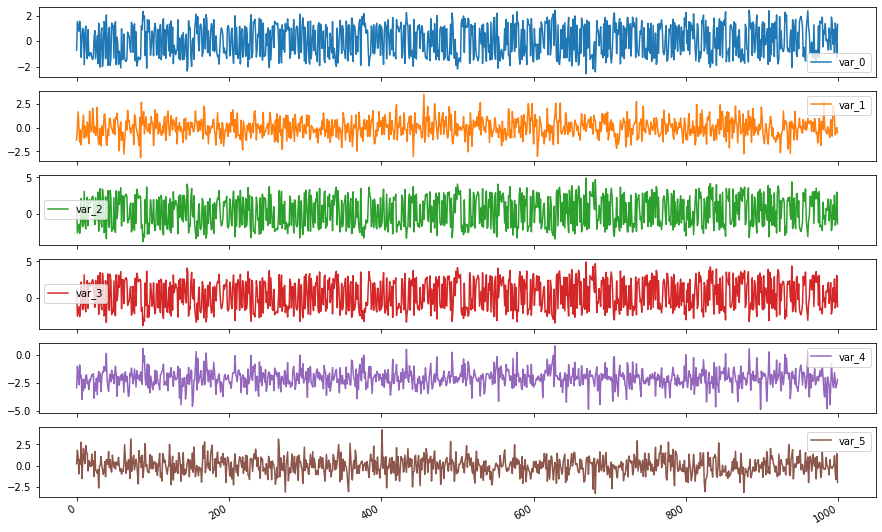

In [97]:
import random
time = X.index

coefficients = [0.05, -0.025, 0.020, 0.075, -0.01, 0.005, 0.01, -0.075, 0.025, -0.05]

for col in X.columns:
    X[col] = X[col] + (random.choice(coefficients) * time / 100)
    
X.plot(subplots=True, figsize=(15, 10))

In [98]:
transformer = DropHighPSIFeatures()
X_no_drift = transformer.fit_transform(X)

In [99]:
transformer.psi_values_

{'var_0': 0.13337057461759086,
 'var_1': 0.023666972688631875,
 'var_2': 0.08863541311591101,
 'var_3': 0.08336295398677111,
 'var_4': 0.029495914277875842,
 'var_5': 0.05372089662117096}

<AxesSubplot:>

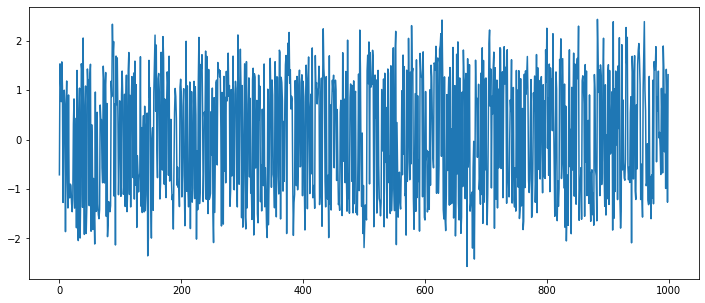

In [100]:
X['var_0'].plot(figsize=(12, 5))